In [304]:
#import
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [305]:
# load data: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset
data_path = 'data/'
csv_folder = data_path + 'CBIS-DDSM/csv/'
jpeg_folder = data_path + 'CBIS-DDSM/jpeg/'

dicom_data = pd.read_csv(csv_folder + 'dicom_info.csv')

# autorize all the columns to be displayed
pd.set_option('display.max_columns', None)
# autorize all the content of the rows to be displayed
pd.set_option('display.max_colwidth', None)

# print first 5 rows
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,HighBit,InstanceNumber,LargestImagePixelValue,Laterality,Modality,PatientBirthDate,PatientID,PatientName,PatientOrientation,PatientSex,PhotometricInterpretation,PixelRepresentation,ReferringPhysicianName,Rows,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg,NaN,16,16,BREAST,351,20160426,131732.685,WSD,15,1,65535,R,MG,NaN,Mass-Training_P_01265_RIGHT_MLO_1,Mass-Training_P_01265_RIGHT_MLO_1,MLO,NaN,MONOCHROME2,0,NaN,289,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.426380754911844882201419900442081103076,1,MathWorks,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725036643043149877819,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,15,1,65535,R,MG,NaN,Mass-Training_P_01754_RIGHT_CC,Mass-Training_P_01754_RIGHT_CC,CC,NaN,MONOCHROME2,0,NaN,6256,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.235715018911442345533339224491594398571,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612443997862211969669,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,15,1,65535,R,MG,NaN,Calc-Training_P_00232_RIGHT_CC,Calc-Training_P_00232_RIGHT_CC,CC,NaN,MONOCHROME2,0,NaN,4126,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.212917405611495375422194124032450014293,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701017460903623585574,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.jpg,NaN,16,16,BREAST,97,20160503,115347.770,WSD,15,1,65535,L,MG,NaN,Calc-Test_P_00562_LEFT_CC_2,Calc-Test_P_00562_LEFT_CC_2,CC,NaN,MONOCHROME2,0,NaN,97,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.405776661412249467913600188550817314766,1,MathWorks,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440665960211609580159,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/2-204.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/2-204.jpg,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,7,1,255,NaN,MG,NaN,P_00562_LEFT_CC_2.dcm,P_00562^P_00562,CC,NaN,MONOCHROME2,0,NaN,4560,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.418434643810489919922754459191670588257,1,MathWorks,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440665960211609580159,NaN


In [306]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
print(cropped_images.head())

# replace the image path with the full path
cropped_images = cropped_images.apply(lambda x: data_path + x)
print(cropped_images.head())

# check if the files exist
print("files exists: ", cropped_images.apply(lambda x: os.path.isfile(x)).all())

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.jpg
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/1-034.jpg
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714611485132105265512043047466091/1-149.jpg
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/1-003.jpg
Name: image_path, dtype: object
0     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
3     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.jpg
6     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/1-034.jpg
7     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714611485132105265512043047466091/1-149.jpg
10    data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828

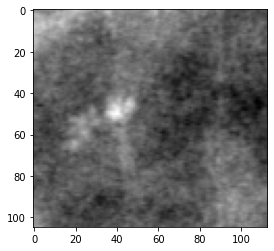

In [307]:
# display the first image
for file in cropped_images.iloc[:10]:
    cropped_images_show = Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [308]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
print(full_mammogram_images.head())

full_mammogram_images = full_mammogram_images.apply(lambda x: data_path + x)
print(full_mammogram_images.head())

print("files exists: ", full_mammogram_images.apply(lambda x: os.path.isfile(x)).all())

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396893911234385024533119100226540488/1-128.jpg
12     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658311383957201426978750903861062/1-248.jpg
15     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.98765885412946410823689524902893984551/1-007.jpg
Name: image_path, dtype: object
1     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
2     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg
11    data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396893911234385024533119100226540488/1-128.jpg
12     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658311383957201426978750903861062/1-248.jpg
15     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.98765885412946410823689524902893

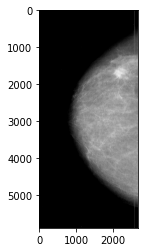

In [309]:
for file in full_mammogram_images.iloc[:10]:
    full_mammogram_images_show = Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [310]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
print(ROI_mask_images.head())

ROI_mask_images = ROI_mask_images.apply(lambda x: data_path + x)
print(ROI_mask_images.head())

print("files exists: ", ROI_mask_images.apply(lambda x: os.path.isfile(x)).all())

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714611485132105265512043047466091/2-127.jpg
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/2-281.jpg
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008050412534761329866492500201501919/1-241.jpg
Name: image_path, dtype: object
5     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg
8     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714611485132105265512043047466091/2-127.jpg
9     data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/2-281.jpg
14    data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg
20    data/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008050412534761329866492500201

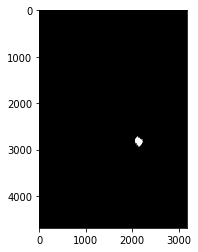

In [311]:
for file  in ROI_mask_images.iloc[:10]:
    ROI_mask_images_show = Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [312]:
calc_case_train_set = pd.read_csv(csv_folder + '/calc_case_description_train_set.csv')
calc_case_train_set.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/000000.dcm,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/000001.dcm\n,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/000000.dcm
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.427517897311902339923511678883689433338/1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727/000000.dcm,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.67512362210319636108148504382680781938/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/000001.dcm\n,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.67512362210319636108148504382680781938/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/000000.dcm
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.201322325113694962619881476352450072222/1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297/000000.dcm,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.241202057913673145232234613012384759880/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/000001.dcm\n,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.241202057913673145232234613012384759880/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/000000.dcm
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.370479499712916693322010643793108454887/1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446/000000.dcm,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.314250272911170289203882349024229868823/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/000001.dcm\n,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.314250272911170289203882349024229868823/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/000000.dcm
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.162256682111885666305889708873412464189/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/000000.dcm,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.336811694512764490002272925921108351157/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/000001.dcm\n,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.336811694512764490002272925921108351157/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/000000.dcm


In [313]:
calc_case_test_set = pd.read_csv(csv_folder + '/calc_case_description_test_set.csv')
calc_case_test_set.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009/1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992/000000.dcm,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942/1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515/000001.dcm\n,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942/1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515/000000.dcm
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.384159464510350889125645400702639717613/1.3.6.1.4.1.9590.100.1.2.174390361112646747718661211471328897934/000000.dcm,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.29112199613143138535387754440942211739/1.3.6.1.4.1.9590.100.1.2.188613955710170417803011787532523988680/000001.dcm\n,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.29112199613143138535387754440942211739/1.3.6.1.4.1.9590.100.1.2.188613955710170417803011787532523988680/000000.dcm
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.177706148911820252341905176394069228468/1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304/000000.dcm,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.200764632211227648028305709420627883105/1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851/000001.dcm\n,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.200764632211227648028305709420627883105/1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851/000000.dcm
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.177706148911820252341905176394069228468/1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304/000000.dcm,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590.100.1.2.248538452013626298441249276382187367143/1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570/000001.dcm\n,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590.100.1.2.248538452013626298441249276382187367143/1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570/000000.dcm
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.328421320411501709324953698601549885215/1.3.6.1.4.1.9590.100.1.2.44262460211112930513355519060642708846/000000.dcm,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.348569460311013218440657632223354965172/1.3.6.1.4.1.9590.100.1.2.126295284812046209819441424913058621714/000001.dcm\n,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.348569460311013218440657632223354965172/1.3.6.1.4.1.9590.100.1.2.126295284812046209819441424913058621714/000000.dcm


In [314]:
mass_case_train_set = pd.read_csv(csv_folder + '/mass_case_description_train_set.csv')
mass_case_train_set.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.dcm,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.dcm,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.dcm,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.dcm,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/000000.dcm,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.dcm,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.174047308712169195014610267031196524486/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/000000.dcm,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.dcm,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


In [315]:
mass_case_test_set = pd.read_csv(csv_folder + '/mass_case_description_test_set.csv')
mass_case_test_set.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.416403281812750683720028031170500130104/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/000000.dcm,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.259596319110047779433501728143778409887/1.3.6.1.4.1.9590.100.1.2.30820586311062570442302321942433426184/000000.dcm,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.259596319110047779433501728143778409887/1.3.6.1.4.1.9590.100.1.2.30820586311062570442302321942433426184/000001.dcm\n
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.125010935311829990124529079264106154392/1.3.6.1.4.1.9590.100.1.2.85952214611170506017891429690540035518/000000.dcm,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.207144238612220754118040203520552715563/1.3.6.1.4.1.9590.100.1.2.381440141511137044327302306604206077287/000000.dcm,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.207144238612220754118040203520552715563/1.3.6.1.4.1.9590.100.1.2.381440141511137044327302306604206077287/000001.dcm\n
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.289610447411344525237308079592285912683/1.3.6.1.4.1.9590.100.1.2.22131189612893294827907969600765582967/000000.dcm,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.265130777712709757209861180301164730118/1.3.6.1.4.1.9590.100.1.2.212143028513012144941507232513982203672/000000.dcm,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.265130777712709757209861180301164730118/1.3.6.1.4.1.9590.100.1.2.212143028513012144941507232513982203672/000001.dcm\n
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.22378064110931464632702821421529389998/1.3.6.1.4.1.9590.100.1.2.239949064412092068706566726490415129934/000000.dcm,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.66862495211464129620756742774012127297/1.3.6.1.4.1.9590.100.1.2.15403043813402510742192372832381918984/000000.dcm,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.66862495211464129620756742774012127297/1.3.6.1.4.1.9590.100.1.2.15403043813402510742192372832381918984/000001.dcm\n
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.304236983211992984124654432490357131069/1.3.6.1.4.1.9590.100.1.2.215081818713600536113960661873725083371/000000.dcm,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.362221700813915332616463215463274950690/1.3.6.1.4.1.9590.100.1.2.199593071810497070809647901570077988031/000000.dcm,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.362221700813915332616463215463274950690/1.3.6.1.4.1.9590.100.1.2.199593071810497070809647901570077988031/000001.dcm\n


In [316]:
# dicom_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
#                                                 'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
#                                                 'StudyDate','StudyID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)
# dicom_data.info()
# dicom_data.isna().sum()
print(dicom_data.head())
dicom_data.drop(['AccessionNumber', 'Laterality', 'PatientBirthDate', 'PatientSex', 'ReferringPhysicianName'], axis=1, inplace=True)
# dicom_data.drop(['AccessionNumber', 'Laterality', 'PatientBirthDate', 'PatientSex'])
# dicom_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
# dicom_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_data.isna().sum()

                                                                                    file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.dcm   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.dcm   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.dcm   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/2-204.dcm   

                                                                                  image_path  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.959

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
Columns                                          0
ContentDate                                      0
ContentTime                                      0
ConversionType                                   0
HighBit                                          0
InstanceNumber                                   0
LargestImagePixelValue                           0
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
Rows                                             0
SOPClassUID                    

In [317]:
# cleaning of the calc_case_train_set
calc_case_train_set = calc_case_train_set.copy()
# calc_case_train_set.isna().sum()

calc_case_train_set['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
calc_case_train_set['calc distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
calc_case_train_set.isna().sum()

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [318]:
# cleaning of the calc_case_test_set
calc_case_test_set = calc_case_test_set.copy()
# calc_case_test_set.isna().sum()

calc_case_test_set['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
calc_case_test_set['calc distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
calc_case_test_set.isna().sum()

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [319]:
# cleaning of the mass_case_train_set
mass_case_train_set = mass_case_train_set.copy()
# mass_case_train_set.isna().sum()

mass_case_train_set['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
mass_case_train_set['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True)

mass_case_train_set.isna().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [320]:
# cleaning of the mass_case_test_set
mass_case_test_set = mass_case_test_set.copy()
# mass_case_test_set.isna().sum()

# mass_case_test_set['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
mass_case_test_set['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True)

mass_case_test_set.isna().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [321]:
train_df = mass_case_train_set
test_df = mass_case_test_set

# Parcourir les chemins de fichier et extraire la partie spécifique
def extract_uid(file_path):
    # Diviser le chemin en segments en utilisant le caractère "/"
    segments = file_path.split("/")
    # Extraire la partie spécifique de la chaîne
    uid_part = segments[-2]
    return uid_part

# Appliquer la fonction d'extraction à chaque chemin de fichier dans le DataFrame
train_df['full_mammogram_uid_part'] = train_df['image file path'].apply(extract_uid)
test_df['full_mammogram_uid_part'] = test_df['image file path'].apply(extract_uid)

train_df['cropped_uid_part'] = train_df['cropped image file path'].apply(extract_uid)
test_df['cropped_uid_part'] = test_df['cropped image file path'].apply(extract_uid)

train_df['roi_mask_uid_part'] = train_df['ROI mask file path'].apply(extract_uid)
test_df['roi_mask_uid_part'] = test_df['ROI mask file path'].apply(extract_uid)

def get_image_link(series_description, uid_part):
    filtered_data = dicom_data[(dicom_data.SeriesDescription == series_description) & (dicom_data.SeriesInstanceUID == uid_part)]
    if not filtered_data.empty:
        image_link = filtered_data.iloc[0]['image_path']
        image_link_from_folder = data_path + image_link
        return image_link_from_folder
    else:
        return ""

# Appliquer la fonction à chaque ligne du DataFrame pour chaque type d'image
train_df['full_mammogram_image_path'] = train_df.apply(lambda row: get_image_link("full mammogram images", row['full_mammogram_uid_part']), axis=1)
test_df['full_mammogram_image_path'] = test_df.apply(lambda row: get_image_link("full mammogram images", row['full_mammogram_uid_part']), axis=1)

train_df['cropped_image_path'] = train_df.apply(lambda row: get_image_link("cropped images", row['cropped_uid_part']), axis=1)
test_df['cropped_image_path'] = test_df.apply(lambda row: get_image_link("cropped images", row['cropped_uid_part']), axis=1)

train_df['roi_mask_image_path'] = train_df.apply(lambda row: get_image_link("ROI mask images", row['roi_mask_uid_part']), axis=1)
test_df['roi_mask_image_path'] = test_df.apply(lambda row: get_image_link("ROI mask images", row['roi_mask_uid_part']), axis=1)

# Afficher les DataFrames avec les nouveaux chemins d'image
print(train_df.head())
# print(test_df.head())

  patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1   

In [322]:
# Supprime les colonnes inutiles
train_df = train_df.drop(['patient_id', 'breast_density', 'left or right breast', 'abnormality id', 'abnormality type', 'assessment', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path', 'full_mammogram_uid_part', 'cropped_uid_part', 'roi_mask_uid_part'], axis=1)
train_df = train_df.dropna()
# print(train_df.head())
test_df = test_df.drop(['patient_id', 'breast_density', 'left or right breast', 'abnormality id', 'abnormality type', 'assessment', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path', 'full_mammogram_uid_part', 'cropped_uid_part', 'roi_mask_uid_part'], axis=1)
test_df = test_df.dropna()
# print(test_df.head())

In [323]:
# # 6min32
# # Choix des images utilisées pour l'entraînement
# path_of_images = 'full_mammogram_image_path' # and 'cropped_image_path' or 'roi_mask_image_path'

# # preprocessing of the data
# def preprocess_data(df):
#     X = []
#     y = []
#     for index, row in df.iterrows():
#         img_path = row[path_of_images]
#         label = row['pathology']
#         img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
#         img_array = keras.preprocessing.image.img_to_array(img) / 255.0
#         X.append(img_array)
#         y.append(label)
#     X = np.array(X)
#     y = np.array(y)
#     return X, y

# X_train, y_train = preprocess_data(train_df)
# X_test, y_test = preprocess_data(test_df)

# print(X_train.shape, y_train.shape)

# Convertir les étiquettes en valeurs numériques
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# Convertir les étiquettes en one-hot encoding
# num_classes = len(label_encoder.classes_)
# y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
# y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

In [324]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Définir les dimensions des images
# img_height, img_width, img_channels = X_train.shape[1:]

# # Encoder les étiquettes en valeurs numériques
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
# num_classes = len(label_encoder.classes_)

# # Convertir les étiquettes en vecteurs binaires (one-hot)
# y_train_onehot = to_categorical(y_train_encoded, num_classes)
# y_test_onehot = to_categorical(y_test_encoded, num_classes)

# # Définir l'architecture du CNN
# model = Sequential([
#     Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

# # Compiler le modèle
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Entraîner le modèle
# model.fit(X_train, y_train_onehot, batch_size=32, epochs=10, validation_data=(X_test, y_test_onehot))

# # Évaluer le modèle sur les données de test
# loss, accuracy = model.evaluate(X_test, y_test_onehot)
# print(f"Test Accuracy: {accuracy}")

In [325]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Chargement et prétraitement des images
# def preprocess_image(image_path):
#     img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
#     img_array = keras.preprocessing.image.img_to_array(img) / 255.0
#     return img_array

# # Définir les dimensions des images
# img_height, img_width, img_channels = 150, 150, 3

# # X_train
# X_train_full_mammogram = np.array([preprocess_image(path) for path in train_df['full_mammogram_image_path']])
# X_train_cropped = np.array([preprocess_image(path) for path in train_df['cropped_image_path']])
# X_train_roi_mask = np.array([preprocess_image(path) for path in train_df['roi_mask_image_path']])

# # X_test
# X_test_full_mammogram = np.array([preprocess_image(path) for path in test_df['full_mammogram_image_path']])
# X_test_cropped = np.array([preprocess_image(path) for path in test_df['cropped_image_path']])
# X_test_roi_mask = np.array([preprocess_image(path) for path in test_df['roi_mask_image_path']])


In [326]:
from joblib import Parallel, delayed
import multiprocessing

# Grâce à la parallélisation, le chargement et le prétraitement des images sont plus rapides (environ 2 minutes alors que cela prendrait environ 20 minutes sans parallélisation)

# Définir les dimensions des images
img_height, img_width, img_channels = 150, 150, 1

# Fonction pour le prétraitement d'une image
def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img) / 255.0
    return img_array

# Utilisation de la parallélisation pour le chargement et le prétraitement des images
num_cores = multiprocessing.cpu_count()  # Nombre de cœurs CPU disponibles
X_train_full_mammogram = np.array(Parallel(n_jobs=num_cores)(delayed(preprocess_image)(path) for path in train_df['full_mammogram_image_path']))
X_train_cropped = np.array(Parallel(n_jobs=num_cores)(delayed(preprocess_image)(path) for path in train_df['cropped_image_path']))
X_train_roi_mask = np.array(Parallel(n_jobs=num_cores)(delayed(preprocess_image)(path) for path in train_df['roi_mask_image_path']))

X_test_full_mammogram = np.array(Parallel(n_jobs=num_cores)(delayed(preprocess_image)(path) for path in test_df['full_mammogram_image_path']))
X_test_cropped = np.array(Parallel(n_jobs=num_cores)(delayed(preprocess_image)(path) for path in test_df['cropped_image_path']))
X_test_roi_mask = np.array(Parallel(n_jobs=num_cores)(delayed(preprocess_image)(path) for path in test_df['roi_mask_image_path']))

In [329]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Concatenate
from keras.models import Model
from keras.layers import BatchNormalization

# Y_train
y_train = train_df['pathology']

# Y_test
y_test = test_df['pathology']

# Encoder les étiquettes en valeurs numériques
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
print("Nombre classe: ", num_classes)
# print("Y_train_encoded: ", y_train_encoded)

# # Convertir les étiquettes en vecteurs binaires (one-hot)
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)
# print("Y_train_onehot: ", y_train_onehot)

# Création d'un modèle CNN
# input_full_mammogram = Input(shape=(150, 150, 3))
# input_cropped = Input(shape=(150, 150, 3))
# input_roi_mask = Input(shape=(150, 150, 3))

# Convolution et MaxPooling pour chaque type d'image
## Full Mammogram
# conv1_full = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(input_full_mammogram)
# norm1_full = BatchNormalization()(conv1_full)
# pool1_full = MaxPooling2D(pool_size=(2, 2), strides=2)(norm1_full)

# conv2_full = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(pool1_full)
# norm2_full = BatchNormalization()(conv2_full)
# pool2_full = MaxPooling2D(pool_size=(3, 3), strides=2)(norm2_full)

# conv3_full = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(pool2_full)
# norm3_full = BatchNormalization()(conv3_full)
# pool3_full = MaxPooling2D(pool_size=(3, 3), strides=2)(norm3_full)

# conv4_full = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(pool3_full)
# norm4_full = BatchNormalization()(conv4_full)
# pool4_full = MaxPooling2D(pool_size=(3, 3), strides=2)(norm4_full)

# flat_full = Flatten()(pool4_full)

## Cropped
# conv1_cropped = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(input_cropped)
# norm1_cropped = BatchNormalization()(conv1_cropped)
# pool1_cropped = MaxPooling2D(pool_size=(2, 2), strides=2)(norm1_cropped)

# conv2_cropped = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(pool1_cropped)
# norm2_cropped = BatchNormalization()(conv2_cropped)
# pool2_cropped = MaxPooling2D(pool_size=(3, 3), strides=2)(norm2_cropped)

# conv3_cropped = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(pool2_cropped)
# norm3_cropped = BatchNormalization()(conv3_cropped)
# pool3_cropped = MaxPooling2D(pool_size=(3, 3), strides=2)(norm3_cropped)

# conv4_cropped = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(pool3_cropped)
# norm4_cropped = BatchNormalization()(conv4_cropped)
# pool4_cropped = MaxPooling2D(pool_size=(3, 3), strides=2)(norm4_cropped)

# flat_cropped = Flatten()(pool4_cropped)

## ROI Mask
# conv1_mask = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(input_roi_mask)
# norm1_mask = BatchNormalization()(conv1_mask)
# pool1_mask = MaxPooling2D(pool_size=(2, 2), strides=2)(norm1_mask)

# conv2_mask = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(pool1_mask)
# norm2_mask = BatchNormalization()(conv2_mask)
# pool2_mask = MaxPooling2D(pool_size=(3, 3), strides=2)(norm2_mask)

# conv3_mask = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(pool2_mask)
# norm3_mask = BatchNormalization()(conv3_mask)
# pool3_mask = MaxPooling2D(pool_size=(3, 3), strides=2)(norm3_mask)

# conv4_mask = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(pool3_mask)
# norm4_mask = BatchNormalization()(conv4_mask)
# pool4_mask = MaxPooling2D(pool_size=(3, 3), strides=2)(norm4_mask)

# flat_mask = Flatten()(pool4_mask)

# Concaténation des couches aplaties
# concatenated = Concatenate()([flat_full, flat_cropped, flat_mask])

# Couche Dense pour la classification
# dense1 = Dense(128, activation='relu')(concatenated)
# output = Dense(num_classes, activation='softmax')(dense1) # Softmax pour la classification multiclasse (sigmoid pour la classification binaire)

# Création du modèle
# model = Model(inputs=[input_full_mammogram, input_cropped, input_roi_mask], outputs=output)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv2D(128, kernel_size=(3, 3), activation='relu'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


# Display a summary of the model architecture
# print(model.summary())

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

# Entraîner le modèle
# model.fit([X_train_full_mammogram, X_train_cropped, X_train_roi_mask], y_train_onehot, batch_size=75, epochs=10, validation_data=([X_test_full_mammogram, X_test_cropped, X_test_roi_mask], y_test_onehot))
model.fit(X_train_full_mammogram, y_train_onehot, batch_size=75, epochs=10, validation_data=(X_test_full_mammogram, y_test_onehot))

# Évaluer le modèle sur les données de test
# loss, accuracy = model.evaluate([X_test_full_mammogram, X_test_cropped, X_test_roi_mask], y_test_onehot)
loss, accuracy = model.evaluate(X_test_full_mammogram, y_test_onehot)
print(f"Test Accuracy: {accuracy}")

Nombre classe:  3
Epoch 1/10
18/18 [==============================] - 39s 2s/step - loss: 1.2490 - accuracy: 0.4484 - val_loss: 0.9253 - val_accuracy: 0.5053
Epoch 2/10
18/18 [==============================] - 38s 2s/step - loss: 0.9022 - accuracy: 0.5243 - val_loss: 0.8999 - val_accuracy: 0.4497
Epoch 3/10
18/18 [==============================] - 40s 2s/step - loss: 0.8410 - accuracy: 0.5622 - val_loss: 0.8704 - val_accuracy: 0.5582
Epoch 4/10
18/18 [==============================] - 39s 2s/step - loss: 0.7705 - accuracy: 0.6191 - val_loss: 0.8724 - val_accuracy: 0.5423
Epoch 5/10
18/18 [==============================] - 40s 2s/step - loss: 0.6733 - accuracy: 0.7026 - val_loss: 0.9885 - val_accuracy: 0.5053
Epoch 6/10
18/18 [==============================] - 39s 2s/step - loss: 0.5798 - accuracy: 0.7428 - val_loss: 0.9483 - val_accuracy: 0.5106
Epoch 7/10
18/18 [==============================] - 37s 2s/step - loss: 0.4770 - accuracy: 0.7936 - val_loss: 1.0750 - val_accuracy: 0.4947
Ep

In [330]:
# Prédire les classes des images de test
y_pred = model.predict(X_test_full_mammogram)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les classes en étiquettes
y_pred_labels = label_encoder.classes_[y_pred_classes]

# Afficher les metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

12/12 [==============================] - 3s 214ms/step
                         precision    recall  f1-score   support

                 BENIGN       0.55      0.34      0.42       194
BENIGN_WITHOUT_CALLBACK       0.47      0.24      0.32        37
              MALIGNANT       0.44      0.72      0.55       147

               accuracy                           0.48       378
              macro avg       0.49      0.43      0.43       378
           weighted avg       0.50      0.48      0.46       378



Images shape:  (10, 150, 150, 1)
Images shape:  (10, 150, 150, 1)


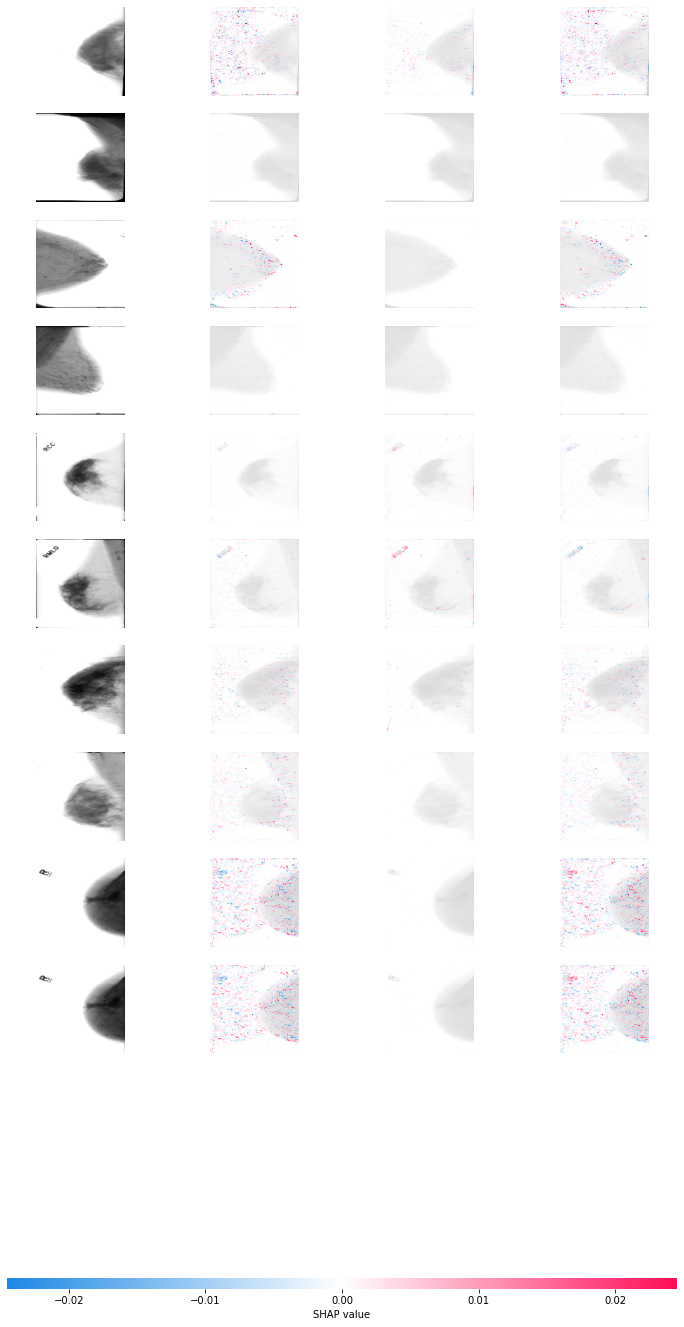

In [332]:
# Use of shap to explain the model's predictions
import shap

number_of_images = 10

# Supprimer la dernière dimension des images
# X_train_full_mammogram_gray = X_train_full_mammogram[..., 0]
# X_test_full_mammogram_gray = X_test_full_mammogram[..., 0]

# 5 images avec MALIGNANT en utilisant Y_train
images_train = X_train_full_mammogram[np.where(y_train == 'MALIGNANT')][0:number_of_images]
print("Images shape: ", images_train.shape)

# 5 images avec MALIGNANT en utilisant Y_test
images_test = X_test_full_mammogram[np.where(y_test == 'MALIGNANT')][0:number_of_images]
print("Images shape: ", images_test.shape)

# Créer un objet explainer
explainer = shap.DeepExplainer(model, images_train)

# Calculer les valeurs Shap pour les 5 premières images de test
shap_values = explainer.shap_values(images_test)

# Afficher les attributions de fonctionnalités
shap.image_plot(shap_values, -images_test)